In [2]:
import autograd.numpy as np
import autograd
from autograd import elementwise_grad,grad
import autograd.numpy.random as npr
import myOptimizers as optims
#import torch.optim as optims
import importlib
import os
import numpy 
import torch
from autograd.numpy import array
#from numba import jit #,autojit
#import multiprocessing
#pool = multiprocessing.Pool(processes=3)

from google.colab import drive
drive.mount('/content/drive')

In [41]:
def init_weights(scale, network_size, rs = npr.RandomState(42)):
  return [(rs.randn(inSize, outSize) * scale,
          rs.rand(outSize) * scale)
          for inSize, outSize in zip(network_size[:-1], network_size[1:])]


Model Definition

In [46]:
from autograd.numpy import array,ravel
#diffeq = Autograd ArrayBox with value 4664.302224688571
#loss = Autograd ArrayBox with value 68817.72138166349

params= {'nn': [(array([[  -6.7314576 ,   43.44028788,   53.40009167,   18.70060029,
           5.66597618,  -28.289012  ,   -3.00649452,  -14.75878942,
           6.75305752,  -76.28568427,  -89.83724669,    5.27419786,
         -42.60771188,   -4.37609284,   11.64165705,  -56.0507116 ,
         -45.01517059,  -10.1313642 ,   61.22300697,  -63.40696725,
        -141.25319649,  -15.43092259,   41.80979115,  -57.15616531,
         -61.95387743,  -24.0978653 ,  121.85092788,  -91.29072071,
         -72.87365256,   32.96127751,   74.60912589,  -17.06300309],
       [ -16.05414418,  -36.56293286,  -29.33606188,   93.57213118,
          46.12743748,    9.01328112,  -10.07145926,   95.57653462,
           7.45447375,  -48.92392263,   51.17866913,  -62.18784527,
         -83.46160919,    1.42396405,   -2.47705307,  -33.41432163,
          33.5667824 ,  -11.98573231,  -18.94142947,  -57.2797528 ,
         -48.69733265,  -15.9128936 ,   12.34976845,   66.76417971,
         -31.02553067,  -74.01174913,    9.52943456,  -32.81452682,
          -8.50201431,   32.67453542,   48.83119565,   12.35081592]]), array([-44.73498611,  53.38510804,  94.61793539,  52.72747854,
        20.90079385,  67.79935001,  12.284589  ,  45.6986841 ,
       -16.57871372,   5.84639352, -41.33725443, -56.9915076 ,
        14.92946802,   8.94225188, -10.10000271,   6.52251678,
        50.33583886, -11.52077093, 113.09343638,  24.16401574,
        -4.82699188,   0.67968655,  72.2241248 ,  89.2780068 ,
        18.97041765, -13.27686973,  -6.44993943,  21.77718715,
        92.05307696, -29.68286328, 110.73808128,  30.206218  ])), (array([[12.81694697722135 ,19.093055920063286 ,9.40630710836822 ,-14.601017077002576 ,-6.61712067881327 ,38.56042811761758 ,-27.465123276431452 ,19.096919385984435 ,-8.372895434836764 ,56.68949333347892 ,-22.759700461906426 ,29.72967985744315 ,30.49867792454453 ,43.22701220284407 ,-32.37027461746365 ,-68.39856406970462 ,31.461855282355444 ,29.366901384449495 ,49.267650890524486 ,-41.399536581071054 ,44.793601942910925 ,59.574575327443334 ,1.0712731299870852 ,7.014740377735204 ,8.89905519381465 ,-34.33629591274271 ,24.72000722183907 ,57.14353203735019 ,2.8247462512693144 ,-57.93987528422794 ,-25.011830843473593 ,-95.81416489078497 ,],
[58.53767507420178 ,46.25782224488892 ,-37.917119596872865 ,-68.92708595862045 ,-34.77823421291588 ,-30.70250668072393 ,2.1940185025552146 ,1.6682575019463137 ,58.83091875869362 ,-23.647585115022018 ,-74.92279599813219 ,-89.76004473446196 ,-1.557762414864044 ,-45.79576028887826 ,-45.49464615104625 ,-4.204262814821584 ,49.77144580487887 ,-42.27649702188021 ,-21.101074408695812 ,28.720645596096183 ,-33.17151184630803 ,28.21933493644127 ,10.444465521536856 ,-7.942792505709575 ,-37.456952044004254 ,68.55896393299052 ,104.71408950372503 ,11.24186658532317 ,-48.52858041642551 ,-25.94557498666199 ,54.61241113080056 ,-37.83092758651558 ,],
[-7.408824575860374 ,17.923817854084493 ,50.486153753837414 ,33.818200577712965 ,39.215952132160446 ,-12.196535249376431 ,19.852831143791732 ,-33.31591704152758 ,40.668721802731035 ,59.81150524752812 ,34.35019298323099 ,-60.9654932702252 ,-1.322004227538406 ,87.56849284536531 ,-32.64633284556935 ,63.671893358185145 ,11.771069854657194 ,-18.191436734187207 ,-61.14262735862094 ,10.973653725683503 ,-1.8682409154980486 ,89.74444588738424 ,-46.378524449837144 ,106.87934465009606 ,42.17469899339813 ,18.40989535849382 ,-42.13814336224205 ,14.722449653002577 ,32.03707457340127 ,26.387866213082436 ,-47.9286641718813 ,70.89433123741911 ,],
[12.900904256838162 ,23.551406619337193 ,-13.802542989496935 ,-51.5585038864786 ,-3.568531673882734 ,32.34755393929986 ,-42.23901142468435 ,71.70268340505518 ,56.82690053175314 ,-61.03359547095036 ,-44.50497687647496 ,-14.53610611646675 ,8.791348921254993 ,8.608089320259365 ,11.418679224538849 ,13.25894611674357 ,-78.69775354228176 ,-49.30135623257942 ,-127.2208358915901 ,56.651472109031076 ,-5.704656996514892 ,42.93885577094919 ,-46.42928959496921 ,1.4067109127582127 ,11.101903201708561 ,-37.44460297011141 ,-84.96858939975729 ,73.39935085716948 ,77.91545647471135 ,8.63641185859524 ,21.452990107610226 ,-14.699890464966208 ,],
[-51.824977938058474 ,85.36589299421465 ,-84.38395169210595 ,-10.50880231702985 ,-11.801464126008677 ,102.01328869495612 ,76.54343627083499 ,-55.28173389674283 ,3.6506299788399676 ,-22.00448596448641 ,-6.8638259458257895 ,39.72947181284757 ,-57.27957898179592 ,0.01476269794560519 ,39.82996455177793 ,35.866578486622814 ,-3.0988523255162193 ,0.6210023034364254 ,0.5299945995539349 ,45.030607205105504 ,-4.908952148503952 ,-60.00426779426701 ,-52.10949674072236 ,-74.20509005111435 ,77.42956050351226 ,32.48589160526112 ,-10.384106794833349 ,-35.19288573583694 ,-24.68684692406844 ,68.70855339891382 ,94.07926963762519 ,-22.23007632673273 ,],
[42.32416158594091 ,7.032115353018936 ,-26.268668268331243 ,70.82437726110786 ,2.9928309013120984 ,21.163718403525685 ,21.00715043857445 ,-82.81906209554884 ,9.838269769566232 ,-25.9454857210212 ,-91.88543499960718 ,-52.781561821907836 ,-24.75215389911028 ,41.94366141443819 ,-91.32052870412315 ,-29.09710033737005 ,12.716709206870068 ,-84.0440710167377 ,-33.21249647581341 ,-88.37805756057972 ,45.097971388397355 ,-10.296598019225266 ,-13.633269032250714 ,35.06626367904621 ,-10.453492052705455 ,-10.603200639671389 ,-59.10041165575144 ,-41.52114186984372 ,-44.975920860401736 ,-46.54219154929559 ,-17.447941833144554 ,9.48376625153376 ,],
[-28.651907745707554 ,-0.5803205918076467 ,28.692479663759542 ,-47.447372781541084 ,-44.469030606964374 ,0.6877717948013602 ,-17.913711726282017 ,-3.994999503366634 ,95.11824381331043 ,-0.9675526915901091 ,-82.3507383028513 ,-73.17298212696366 ,-4.257332015963906 ,-97.75065634062966 ,32.543645040449 ,-116.305716843985 ,7.126113068017383 ,-86.33255735764628 ,-8.478862751865778 ,-29.37327961361376 ,47.92945428682099 ,-15.78631355809888 ,38.1177508404751 ,74.74797734608327 ,40.160084307441664 ,-76.02020504224365 ,-28.914255646703445 ,16.16816853256362 ,-5.603335832839455 ,-45.02631797514155 ,-25.802804917422367 ,36.79661905744465 ,],
[17.92889486383071 ,-12.812474648188166 ,12.218346126410328 ,-29.4204299446089 ,57.25456728744379 ,-4.071730875147034 ,87.02964660480272 ,-45.39965646661461 ,-12.271462893534316 ,-43.49175295897709 ,20.838812465434046 ,52.68692565210668 ,-62.01490218135681 ,-30.925037163271867 ,-55.89421270621662 ,62.873332937682655 ,6.327539779310359 ,-33.07445423723412 ,-13.65588912064431 ,67.33680133662166 ,-12.043708003158589 ,-24.912297352925922 ,-26.851968863783995 ,-46.30981787335946 ,50.04289546332121 ,75.70125999569052 ,-54.58157666029146 ,49.77506266758634 ,-22.380586810476167 ,67.02589120707086 ,66.56903281557533 ,0.9098325268902417 ,],
[-21.460959128681377 ,32.66266459336132 ,-65.73591128651995 ,38.64586236059534 ,9.408880220538377 ,-42.23619766059509 ,-58.038805980904975 ,-37.6168390888157 ,-18.08766090234529 ,-6.464009781069521 ,-77.49696360172663 ,-5.360820014754845 ,22.40453535605846 ,-22.105810247598615 ,8.214893238478336 ,-37.884900461359486 ,40.48231682359737 ,15.055894520379796 ,86.88772022900812 ,128.88829208578602 ,-30.351371187851868 ,-29.371131651746584 ,5.070314280724199 ,32.67509006345767 ,55.93965530905332 ,-40.59903798270463 ,6.4183871876612475 ,-22.056900049097482 ,36.06821136480976 ,42.802804705552056 ,-22.076043870846533 ,-75.54721193590606 ,],
[49.44044924371243 ,-46.248950091301886 ,-0.8826080946620932 ,43.182675293793054 ,2.7063544814262905 ,-0.05206131340098173 ,-33.536483470516025 ,-89.91435905354182 ,35.63792792801558 ,-18.332806698810025 ,100.57240452558496 ,30.493111801461396 ,-45.189465365013405 ,66.46107013500651 ,91.08509990004671 ,-2.6196394010481194 ,47.769583989764264 ,14.380020891021896 ,14.562546831860045 ,36.096791419142924 ,35.353105877874995 ,24.28918894058709 ,11.824575276147355 ,50.175225949953116 ,-16.433114171526835 ,-35.475858942509554 ,-33.32718423072426 ,67.10517412246173 ,-32.5570739751974 ,90.5236320525494 ,-54.1299454317352 ,31.5896024490138 ,],
[7.677471987432295 ,93.36942119700804 ,-40.50842130531282 ,-35.588975510941 ,5.30709990772816 ,77.73393090523605 ,-46.23800315449279 ,-130.51051555490506 ,-9.902675687503063 ,68.57844936802898 ,-39.93657756213921 ,27.430509488854934 ,-51.64704475899812 ,-22.641253981511277 ,10.381305073548939 ,-24.69890073993552 ,13.292817572315888 ,44.71418632628924 ,14.749750670728117 ,-47.48281298804963 ,74.01619718992502 ,44.05721750168472 ,-101.7788809289943 ,19.685946102521644 ,-13.949101393204169 ,20.957966507829518 ,50.37929200238696 ,9.67645695733561 ,-74.48829003924361 ,69.07576733985073 ,71.01845843745674 ,-15.545823741907318 ,],
[21.88025923091461 ,-9.766533833844461 ,-23.286783756909855 ,4.052017937159163 ,-6.814123133761455 ,23.69951717525438 ,-24.674274030087133 ,9.738383128263909 ,8.022223516994465 ,82.45375679863508 ,-30.495897422754293 ,42.73986479043339 ,17.63565075249462 ,-79.03207951600449 ,28.518137155421805 ,63.15708525850244 ,32.92559002258689 ,-24.887366597521154 ,12.940378622173075 ,2.653698502805093 ,-67.98528062460605 ,16.149058826383445 ,5.220283605192734 ,-49.651759770877995 ,94.32417982819646 ,68.84944117734872 ,-51.54242172643154 ,31.55572125996724 ,75.45097288989808 ,-22.057190140288906 ,15.466972101201213 ,-0.26775613670058157 ,],
[-46.91947084793371 ,3.342726017011939 ,66.51343171096669 ,73.34540076771917 ,-36.40440526757676 ,133.57982560641523 ,-79.75403917342673 ,76.69747901480304 ,-61.81647259680505 ,-17.136053543928014 ,-4.404995314634991 ,40.23910221229511 ,-14.875042593549509 ,-16.443899350842752 ,10.924347642388256 ,71.76800504600624 ,0.8152737852506952 ,-26.517227886983452 ,43.08318986779615 ,7.453336535933198 ,-6.361630509787318 ,24.655991542892476 ,89.57305005351755 ,-29.791603759463655 ,-15.040387981507791 ,-43.92004466200814 ,12.490478970464041 ,-32.881462204917 ,17.263965048621223 ,18.596415763659127 ,-19.373372628402652 ,102.14854905196835 ,],
[109.62600847237603 ,20.77164269180289 ,-10.765613822589351 ,-91.3738543497571 ,-37.27100698348969 ,1.8874444941037969 ,-23.840214560420208 ,-49.51299944814446 ,77.33228074461708 ,1.7150198101751162 ,-29.76713703020507 ,-66.16977831253313 ,73.40068995082217 ,-23.643353264055143 ,-61.916824947774025 ,-72.27872163050937 ,-4.9582707446574705 ,-57.663381942735334 ,84.16898256597514 ,89.9224863776863 ,-69.86002143429293 ,-54.63106711994593 ,-33.81987380869453 ,-48.56524403139931 ,39.978829162173255 ,-14.479134219446278 ,4.951464594652582 ,77.92859323019081 ,-49.20639475682211 ,20.356382987505693 ,-39.17399204408802 ,105.65383275408341 ,],
[71.23332651547784 ,-4.404617538060126 ,-51.42580409935537 ,-55.3270914134772 ,31.01979197755149 ,28.765116340201093 ,57.97930817362914 ,129.2517095923344 ,-45.32701330516508 ,-49.91890763685688 ,6.015550839005636 ,60.54608473216656 ,-51.14580237386868 ,31.562555189322023 ,79.56481512271799 ,-65.66072436490073 ,15.102545617660057 ,-59.3870368290176 ,9.504321793362426 ,34.78554158069704 ,16.22576160373933 ,-49.86035520621236 ,-18.923196124301874 ,67.16613483945403 ,46.91615973806689 ,42.63175295206255 ,11.788482135181932 ,65.47113463059966 ,-32.941361502025906 ,-17.344589767331453 ,43.564881472155506 ,55.50267301648946 ,],
[-32.38570267759086 ,-42.62772804741143 ,6.844597825484689 ,79.00470909407633 ,5.697102045230135 ,-59.72357718567077 ,-6.6656997616586136 ,36.807589383049425 ,-52.642278561254805 ,-32.15517789005491 ,5.386323667259717 ,-15.901861567529645 ,-39.46060672448428 ,86.61478181523442 ,22.848948770431665 ,-3.0856829035335065 ,-22.92195050228082 ,4.97009200086963 ,18.370455682133528 ,18.38737759641178 ,-13.0699362228657 ,-57.11029822252777 ,23.06786869588085 ,43.9535225339304 ,-17.874594390526596 ,-6.382461274546809 ,-2.9602105705503514 ,-2.4945980467958946 ,42.65409445297972 ,24.244336052799213 ,-55.94442682939053 ,-46.268561783013595 ,],
[36.46280874946763 ,39.94749820367799 ,31.756290653406914 ,42.36194361055473 ,-9.238129517103415 ,-41.80554951009201 ,-33.944931171662745 ,-79.67922714980601 ,57.2364343525127 ,-21.704286108023556 ,45.460446534273245 ,-12.088163640858257 ,-60.68161168363016 ,-67.16152589518344 ,-29.746349496720228 ,93.90889714436302 ,-52.5056766986294 ,68.25500277045427 ,-41.255312525324584 ,37.58202072329276 ,-9.303067931499013 ,-15.414567867387152 ,-48.05541283676308 ,-6.953918995714854 ,-71.4162338703181 ,-83.92006988788688 ,10.969093405014343 ,-28.52973470179603 ,79.08134713199092 ,33.84833653046202 ,86.11335825512147 ,-34.73665228438577 ,],
[-0.2538191129009616 ,-128.8251832390454 ,-24.515714123204432 ,8.889923568539109 ,6.820577351781611 ,16.139038482243485 ,7.006661538063489 ,-94.41815914498768 ,10.561139331881249 ,10.948403996415909 ,100.7691584102562 ,28.070924485310016 ,-9.00914704787603 ,74.95740678386743 ,-100.10846012842323 ,-10.885925718635894 ,-43.32162821513225 ,24.910869584784322 ,-107.20090742354265 ,68.16177543473327 ,-15.113450086189141 ,14.370588884330601 ,25.453433698330336 ,52.9507632927413 ,-110.02850430602146 ,3.8935877366565443 ,52.77698924424962 ,-36.493500091057925 ,-41.38789296984414 ,-8.994570400969595 ,-12.644648729533598 ,-34.20300409660951 ,],
[-10.594524844709804 ,78.2258392320084 ,-41.99832985728575 ,-27.292624695140173 ,24.042990227105797 ,0.03439832930274744 ,-68.57529789389088 ,9.341679164308477 ,-7.882827728963897 ,52.58120756049153 ,-34.22674721584328 ,21.384340620150557 ,1.2896650013394773 ,-57.9698758522959 ,-77.37657879860228 ,110.0233628909714 ,-11.590405257679882 ,46.92507711550522 ,-81.07555515910028 ,130.85670331087164 ,39.762767829753166 ,-11.748332842537673 ,-14.830750457168964 ,26.993461970405036 ,44.70035197198862 ,10.18797884436004 ,-9.223178123030655 ,30.377446834278395 ,-79.9364902577781 ,-34.03020252237525 ,-79.66186925732387 ,29.246021716872477 ,],
[-15.41871392185491 ,-101.34395162393116 ,-19.125526547277634 ,-3.499216968613439 ,-39.448555124481416 ,-35.47744793442199 ,-77.47775307959637 ,64.90537787350944 ,-15.05205188261938 ,-40.89849766289309 ,7.855911443586744 ,22.73101264455994 ,14.709722822307139 ,37.6554000158878 ,26.79130494638468 ,-7.024004543717614 ,-41.310329583350764 ,-53.1526657844164 ,78.27127790902375 ,69.8242692173378 ,74.38341799384908 ,91.04751679285373 ,-8.1348099594826 ,-3.5848086056202955 ,121.93210749322705 ,-25.60752162751612 ,-10.642506155085096 ,-102.298506318028 ,27.260079485854014 ,138.83281886193365 ,46.00215109986379 ,-6.853638320011082 ,],
[-25.67057216572004 ,-46.583103235189 ,-46.85244153886048 ,-78.92909323674073 ,-2.196658484315874 ,72.01052144050024 ,9.313721009997911 ,104.8400591135621 ,40.005338362793296 ,-20.40363698615156 ,-0.13981905108686551 ,-14.566550049385445 ,-73.8631988524078 ,0.4617773301445773 ,-111.13083112708335 ,54.90188234852476 ,4.927141304190756 ,62.44816405736214 ,44.94718834498012 ,2.898343689350462 ,83.69179158414919 ,38.988935146346904 ,-22.69952280305865 ,-32.63811232272379 ,-133.10053860397315 ,-37.67245630503641 ,-10.819516036192644 ,0.6050495233927362 ,-45.586882938062196 ,-54.04559418433177 ,-79.06473312945155 ,-37.31017726761989 ,],
[103.19690045855425 ,4.495279688180907 ,49.03078442043165 ,-56.71801072953709 ,-84.49782562060985 ,-58.580729790012654 ,15.600401337334663 ,-82.8894520069506 ,-41.057706186347524 ,-38.44478113456138 ,-65.31825826342966 ,-125.3577421690072 ,33.25786161469841 ,-0.3870216536342304 ,31.356006509559695 ,-60.895607951912275 ,24.61267163875561 ,77.38819606879858 ,23.484806185013877 ,-18.595514720230316 ,-7.096267820918384 ,-44.70913237114752 ,-32.02191664523368 ,33.07416188023823 ,6.278315649587984 ,48.5181709119922 ,-33.43299544611613 ,-9.123326033660225 ,-21.215401704582494 ,-79.1808673813205 ,33.916193322835504 ,121.29567546854719 ,],
[-19.722238173133874 ,-34.3728311426277 ,-45.81080792171922 ,-39.90365227011976 ,80.39995640747297 ,-21.409760233842636 ,-23.405892073218936 ,-53.7151168713053 ,15.846183355648883 ,-9.5568823856669 ,-46.981023962912644 ,-81.22178817964269 ,89.03820528627203 ,1.4489725425793782 ,0.43538773432022343 ,14.403581847671637 ,63.83925481716012 ,-52.01319344634595 ,-12.445029988025105 ,-5.389424539131303 ,-93.6763004655247 ,-48.986895332604625 ,51.548188751162115 ,31.876909055374014 ,69.59052443968136 ,-32.50829179677491 ,-34.10628034121616 ,-89.24655657277562 ,55.96282434754539 ,39.679817781100105 ,54.93301566088617 ,83.38126331394126 ,],
[12.365274385631306 ,71.7760039489485 ,-30.68480274703265 ,-97.39615892783338 ,39.9651322401867 ,-79.91296251142097 ,17.610830320150846 ,72.41448651869494 ,24.545620723828623 ,113.22639071185958 ,-94.9582211390786 ,-8.68640449370799 ,-5.1807338230556645 ,-68.16557688103802 ,-58.74690450172735 ,-30.535180355492898 ,-64.7865799088436 ,-13.269489716485312 ,-16.437586392824613 ,24.097167788566697 ,35.177432385217045 ,21.11930715185079 ,2.6321023788064246 ,21.76753576363588 ,13.078593902447109 ,14.293852239376813 ,79.31664297417731 ,19.552292300822444 ,86.52096797805498 ,-116.85089831798804 ,-4.072788771097311 ,-7.928544438780052 ,],
[-30.64977473335163 ,-24.523585253466845 ,0.5109299438311203 ,-67.25338675114585 ,26.762943358092862 ,-62.113999404918836 ,39.51381705492483 ,28.439532165505735 ,-16.437793598998212 ,53.26026621409754 ,-57.86712565021581 ,27.126429900706206 ,32.98698151080389 ,4.390437918205454 ,-5.65647928388768 ,63.077493206519236 ,-4.785993627878864 ,-57.1162265454527 ,13.926849471841983 ,-23.75783011334259 ,72.36335088804998 ,34.42901177839006 ,-29.540626666995493 ,-2.4584950563444483 ,-38.04251128500626 ,63.32047131031886 ,-50.76812915627115 ,94.52432654893342 ,-1.864925237108419 ,-18.202341600650694 ,56.18298128637443 ,9.70328911034605 ,],
[61.43105329397243 ,68.07586038819682 ,7.502225406556308 ,-31.60456185646862 ,-36.488134874949814 ,3.4465392712705905 ,83.03594432902653 ,17.608395492355587 ,-24.313119556509715 ,82.19500321208068 ,19.32637965338147 ,-0.8654210823747491 ,13.388072817134702 ,30.141061857580837 ,-37.18441014580063 ,50.910782144375794 ,-41.91212998608209 ,7.668073637144674 ,-3.8307671653662454 ,13.467878464848008 ,-102.9240670567259 ,-17.59969874634987 ,73.92403819179358 ,60.13927466404673 ,-72.52876582710233 ,44.82731461747098 ,-34.13948508681027 ,-23.57256958676896 ,-16.914785879295472 ,32.8892645973998 ,54.74436212102293 ,14.222619033641065 ,],
[6.041163729513641 ,43.812937631145196 ,-29.77238273960351 ,-3.6344546998968514 ,37.606165106170664 ,26.543101210281268 ,-22.878541038411523 ,-55.07057703765752 ,16.38927216735322 ,-85.15377579297348 ,-2.649833044458022 ,50.40835760224227 ,38.510147025684155 ,-102.20650121762915 ,26.82053996476169 ,-4.713770645921301 ,-77.13896207802468 ,31.967872046447876 ,-18.399757780057506 ,-17.38948942589717 ,-10.469410617315281 ,-37.7588230406312 ,18.543675960928493 ,-36.309272176426546 ,-19.145785136341086 ,42.981263731116414 ,48.06610139882279 ,-71.4736178001477 ,44.832093109327516 ,55.87388021837797 ,78.3100673081101 ,32.796207670768446 ,],
[-39.86646111867353 ,18.462033689761917 ,-26.741149945039854 ,-22.602306503223407 ,-1.5853526513892158 ,-32.81753073429069 ,-56.67306490469817 ,67.17877612599136 ,102.08931263863711 ,47.24419584366025 ,62.07308390820948 ,44.40503574567653 ,8.149226514590488 ,38.06050719899471 ,83.59231920546948 ,-72.77360446916603 ,-10.367568421292532 ,15.242820693077169 ,18.279564727222184 ,-7.920616632176515 ,12.719193466433493 ,-55.761206231307426 ,-1.224425835217862 ,-29.194729129502033 ,44.83862708314674 ,-15.450098682779887 ,-41.11299600220493 ,-19.03130142741653 ,15.604042313605598 ,103.09459333055176 ,-67.58180411888048 ,49.093953584952985 ,],
[-24.608952623078377 ,0.20692467912224477 ,48.71769710663092 ,65.13271334539624 ,-1.3429963955017126 ,-54.40807868829178 ,55.218123929208446 ,-53.16375859010363 ,-94.56908312066645 ,-20.244541741781926 ,58.59064993036539 ,-51.35977814014529 ,-18.409702241320016 ,7.445698720097294 ,-5.713278449322984 ,10.809556853017392 ,49.16602335599429 ,-81.2731970296764 ,-42.046264912627315 ,-18.840940752382306 ,39.07566858713111 ,62.17197550577541 ,-100.1686514317756 ,-72.31500060810436 ,20.442846192404154 ,29.36692340514649 ,95.31011240089992 ,-5.744407869963036 ,-94.43101799453781 ,-7.330979474136195 ,111.2045336449887 ,-106.51804957412058 ,],
[69.67162965767508 ,37.72457785644171 ,21.89258539361188 ,76.18103877230959 ,66.2884146132949 ,3.544663644787982 ,69.96641637816619 ,25.65190407361083 ,38.12478174488345 ,77.06075794296859 ,-36.46246035571563 ,33.28419857646103 ,-30.046634966178047 ,-3.4078250533552232 ,-34.38380347280513 ,14.241676370076144 ,86.21084333924838 ,-76.51473445196544 ,-101.22212335954585 ,-113.25759958954401 ,71.36072694057314 ,-22.227965547564224 ,-0.9844298254075136 ,-26.70765150509332 ,-48.56102851942622 ,59.1184561250378 ,-13.426903498156177 ,-20.622624475631127 ,-2.035019611692718 ,46.92528276860414 ,-32.643343721472846 ,27.200849310731876 ,],
[73.06527010579202 ,-75.22144007011252 ,9.798033650351014 ,-21.839186712627992 ,30.31767067847904 ,-41.25729707828585 ,89.39938046681193 ,-59.14307524032115 ,-7.349422990814992 ,5.066033259249652 ,-17.294210931122166 ,-70.4627551763082 ,25.94052106948525 ,10.79686471161497 ,13.149902907181177 ,52.09962623475341 ,-30.354854339554404 ,24.789800654533728 ,-16.919752971295566 ,-34.512953443796135 ,-24.49432267417752 ,-32.85854762550315 ,-16.937796579510874 ,53.41114348392587 ,5.956667146721179 ,-40.97430084793982 ,-9.452421186694279 ,-4.034742033952987 ,-46.751139114822415 ,-19.77165714180225 ,-17.783279160349466 ,-0.5433103156744363 ,],
[36.77963440833015 ,-3.6263351719443473 ,74.61961852371236 ,-3.866673212147486 ,72.83286281323845 ,11.71334312321708 ,-0.479354802057812 ,10.489828449318319 ,74.45026016304743 ,-59.90776386854115 ,-50.319948985085624 ,-49.22833043384112 ,12.059632261952297 ,32.96269413329582 ,52.56954766314326 ,-5.818364030568115 ,54.20421080266703 ,-53.08468688176156 ,60.90011044839218 ,21.93281929437906 ,78.24272985337521 ,-85.24647040058332 ,-70.69034022610579 ,96.39337328189076 ,-13.713096422497394 ,-44.52966888437472 ,-64.66771574412334 ,84.15928623308844 ,-51.967223201812196 ,-6.193471011237503 ,-20.318202137234458 ,62.84749917305954 ,],
]), array([ 18.90881218,  12.08975447,  -3.00345653,  12.24245136,
        22.56521956,  29.49849606,  46.16018781,  10.0664862 ,
        11.63839857,  28.87271155,  48.88548994,  38.56650741,
       -11.36824098,  62.50314786,  33.80558704,  30.70040278,
         5.80473479,  20.96846574,  39.93737441,  16.0111368 ,
        15.35916283,  48.17632731,  35.55247838,   5.32698105,
        26.20433801,  14.96773145,  16.56580357,  22.04134046,
        59.04023253,  27.45690337,  34.41660792,  23.73926068])), (array([[  73.34302097],
       [ -27.61790001],
       [  -2.17488847],
       [ 137.97619822],
       [ -21.3989356 ],
       [ -59.79543487],
       [  19.63018359],
       [ -31.01369478],
       [   7.78217681],
       [ -12.15112098],
       [ 108.40362663],
       [  42.63889027],
       [ -57.88684987],
       [ -24.44876154],
       [ -37.72508832],
       [ -12.72915137],
       [ -64.77317006],
       [ 111.58182076],
       [ -41.82248485],
       [  51.31510057],
       [ -20.76339074],
       [ -56.80988601],
       [ -23.22324229],
       [  31.41065422],
       [  21.8129944 ],
       [-130.03869036],
       [ -71.72414838],
       [  11.31078696],
       [ -51.07252148],
       [ -27.21134404],
       [ -68.78081706],
       [  66.14201678]]), array([33.7454027]))]}
#for i in range (6):

print (len(params['nn']))

3



# Intializations

In [54]:

def bound(Tinit):
    
    #  Left boundary.
    j = 0
    for i in range ( 0,divs ):
        Tinit[i][j]=0
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        Tinit[i][j] = 0
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        Tinit[i][j] = 0
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        Tinit[i][j] = 0
    return Tinit

In [55]:
def boundryinit(Tinit):
    
    #  Left boundary.
    j = 0
    for i in range ( 0,divs ):
        Tinit[i][j]=psix0
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        Tinit[i][j] = psix1
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        Tinit[i][j] = psiy1
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        Tinit[i][j] = psiy0
    return Tinit

In [56]:

psix0 = 100 # Boundry condition
psix1 = 20 # Boundry condition
psiy0 = 100
psiy1 = 40
ep=0.000000001
l = 2 # Length of rod
b = 1 #radius
n = 9# Energy level to be found
scale = 2 # For initialization
divs = 16 # Divisions of x scale
x0 = ep
x1 = l
y0 = ep
y1 = b

#params={'nn':init_weights(100.0/(x1-x0), network_size = [2,32,32,1])}
print (params['nn'])

[(array([[-9.44483439e+00,  2.76536638e+01, -1.68432635e+00,
        -4.75174092e+01, -4.35286308e+01, -4.92136188e+01,
         4.85450366e+01, -3.08723306e+01, -9.56051581e+01,
         1.98419333e+01,  7.57258782e+01,  3.86541595e+01,
        -3.01661783e+01, -7.93405858e+01, -6.71340517e+00,
        -7.96119391e+00, -4.84599805e+01,  2.75518651e+01,
         9.23313251e+01,  1.11141359e+01,  8.02381035e+00,
        -4.68614025e+01,  6.98707352e+01, -3.75720834e+00,
        -2.89481628e+01,  3.18441968e+00,  2.35980667e+01,
         6.96077044e+00,  6.03076698e+01,  1.91985776e+01,
        -1.41970906e+01,  2.00596108e+01],
       [ 2.49818551e+01, -6.48187960e+01,  5.74709864e+01,
        -1.50452010e+01, -1.37661612e+01,  3.75687994e+01,
         3.73582612e+01, -3.50415840e+01,  4.01450809e+01,
        -2.80224076e+01,  9.09786524e+01, -4.14096991e+01,
         1.19738731e+01, -3.91008819e+01,  1.11134782e+02,
        -6.18910472e+01,  2.62181374e+01, -3.67455207e+01,
        -1.

In [57]:
#Defining the network
#nn_params = init_weights(scale/(x1-x0), network_size = [1,128,64,1])

#Initializing a random Eighen Function

#Einit = 30.0
#params = {"nn" : nn_params, "E": Einit}
#params = {"nn" : nn_params}
#input space
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]
xvec,yvec=np.meshgrid(x,y)
T = np.zeros([divs,divs])
T = boundryinit(T)
xf=array(xvec).reshape([divs*divs])#[:, None]
yf=array(yvec).T.reshape([divs*divs])#[:, None]

#xv, yv = np.meshgrid(X, Y)

# Activation

In [101]:
@jit
def activation(xtilda):
  return (2.0 / (1.0 + np.exp(-2*xtilda))) - 1

def sigmoid(xtilda):
  return 100.0/(1+ 100**(-2*xtilda))

In [18]:

def psix(nnparams, input,input2):
  output=[]
  #output2=[]
  #print(input[divs:2*divs])
  #print (array(input[0][:]).T)
  for i in range (divs*divs):
    inx=array([input[i],input2[i]],dtype=float).T
    #print("out x = ",array(inx))
    for w,b in nnparams['nn']:
        outx =np.dot(inx, w)+b 
        #outy = np.dot(iny, w)+b
        '''
        inx = 100*sigmoid(outx)
        iny = 100*sigmoid(outy)
        '''
        inx=np.abs(outx)/np.max(np.abs(outx))
        #iny=1-np.abs(array(outy))/np.max(array(outx))
        
    output.append(outx)
    #print("out x = ",array(output).shape)
  #input=sigmoid(input)
  #return (1-np.exp((1-xtilda)*xtilda))*input
  output=array(output,dtype=float).reshape([divs,divs])
  
  #output = (1-np.exp(xtilda * (1-xtilda)))*array(output).ravel()
  #output2 =(1-np.exp(ytilda * (1-ytilda)))*array(output2).ravel()
  K=array(np.ones([divs,divs]))
  K=bound(K)
  Tmat=array(np.zeros([divs,divs]))
  Tmat=boundryinit(Tmat)
  out=output*K + Tmat
  '''draw(K+T,xvec,yvec)
  out=output*output2
  print("mult = ",array(output2).shape)
  out= out*K + T
  print("final = ",array(out).shape)
  print("K = ",K.shape)
  print("Tinit = ",T.shape)
  draw(out,xvec,yvec)'''
  return out.reshape([divs*divs])
  #return  psix0 +xtilda*(psix1-psix0)*input
#print (activation(xf))

In [14]:
%%time
dpsix= elementwise_grad(psix, 1)
    

ddpsix = elementwise_grad(dpsix, 1)
            
#ddpsix = elementwise_grad(dpsix, 1)
def psiyy(nnparams, input,input2):
    #xvex,yvec=np.meshgrid(input,input2)
    return array(input2)*array(dpsiy(nnparams,input,input2))
dpsiy= elementwise_grad(psix, 2)

ddpsiy = elementwise_grad(psiyy, 2)
def ddpsiyy(nnparams, input,input2):
    return 1/(input2+ep)*ddpsiy(nnparams, input,input2)
   

#dpsiy = elementwise_grad(psiyy, 2)
#ddpsiy = elementwise_grad(dpsiy, 2)

#print(psix(params['nn'],xvec,yvec))
print(psix(params,xf,yf))
print (xf.shape)

ValueError: too many values to unpack (expected 2)

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
def draw(T,xmat,ymat):
    fig = plt.figure()
    ax = fig.add_subplot ( 111, projection = '3d' )
    ax.plot_surface ( xmat, ymat,T , cmap = 'inferno')
    plt.draw ( )
    plt.show ( block = False ) # Plotting the NN output


    image = T 
    color_mapper = LogColorMapper(palette="Inferno256", low=20, high=100)
    plot = figure(x_range=(x0,x1), y_range=(y0,y1) , title="cs heat map")
    plot.image(image=[image], color_mapper=color_mapper,
               dh=[1.0], dw=[2.0], x=[0], y=[0])
    color_bar = ColorBar(color_mapper=color_mapper,
                         label_standoff=12, border_line_color=None, location=(0,0))
    #color_mapper=mapper['transform'], width=8,  location=(0,0))
    plot.add_layout(color_bar, 'right')
    output_notebook()
    show(plot)


Loading BokehJS ...

In [59]:
## X direction
def psix(nnparams, input,input2):
  output=[]
  input2=input2.reshape([divs,divs]).T.reshape([divs*divs])
  for i in range (divs*divs):
    inx=array([input[i],input2[i]],dtype=float).T
    #print("out x = ",array(inx))
    for w,b in nnparams['nn']:
        outx =np.dot(inx, w)+b 
        inx=np.abs(outx)/np.max(np.abs(outx))
        
    output.append(outx)
  output=array(output,dtype=float).reshape([divs,divs])
  K=array(np.ones([divs,divs]))
  K=bound(K)
  Tmat=array(np.zeros([divs,divs]))
  Tmat=boundryinit(Tmat)
  out=output*K + Tmat
  return out.reshape([divs*divs])


##differenting x##
dpsix= elementwise_grad(psix, 1)
ddpsix = elementwise_grad(dpsix, 1)

## Y direction
def psiy(nnparams, input, input2):
    
    Ti=array(psix(nnparams, input,input2)).reshape([divs,divs])
    Ti=(Ti.T).reshape([divs*divs])
    return Ti

##differenting y : radial function##
def psiyy(nnparams, input,input2):
    #xvex,yvec=np.meshgrid(input,input2)
    return array(input)*array(dpsiy(nnparams,input,input2))

dpsiy= elementwise_grad(psiy, 2)

ddpsiy = elementwise_grad(psiyy, 2)
def ddpsiyy(nnparams, input,input2):
    dt=1/(input+ep)*ddpsiy(nnparams, input,input2)
    dt=(array(dt).reshape([divs,divs])).T
    dt=dt.reshape([divs*divs])
    return dt
   



print(ddpsix(params,xf,yf))
print (ddpsix(params,xf,yf).shape)
#print (activation(xf))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.89295307e+02  1.77912614e+02  1.41560589e+02
  1.15768299e+02 -8.84748223e+01 -1.75456344e+01 -5.46441727e+01
  1.14623959e+01  9.30050976e+00  7.64983308e+00  6.36776932e+00
  5.35691012e+00  4.54917336e+00  3.89599838e+00  0.00000000e+00
  0.00000000e+00  3.54963760e+02  2.74947174e+02  1.32844953e+02
  9.90773949e+01 -7.56451558e+01 -6.60889933e+01 -1.85511018e+01
 -4.48194679e+01  1.42248708e+01  1.17735434e+01  9.85459975e+00
  8.33101285e+00  7.10599012e+00  6.10983838e+00  0.00000000e+00
  0.00000000e+00  2.41200967e+02  3.58405045e+02  1.41809934e+02
  8.90750265e+01  9.56563930e+01 -5.71034499e+01 -2.82215483e+01
 -3.91183087e+01 -3.13477084e+01  1.02664052e+01  8.68514462e+00
  1.79005839e+01  1.49442

# Objective

x grid is (16, 16)
y grid is (16, 16)
T grid is (16, 16)


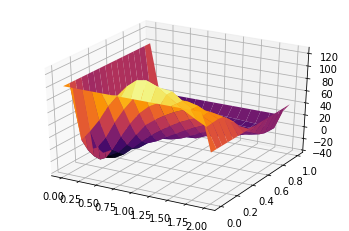

Loading BokehJS ...

Wall time: 324 ms


In [50]:
%%time
# print(V.shape, x.shape)
# xs=x**2
# print(xs.shape)
# print (nn_params)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
Tmat=np.zeros([divs,divs])
K=bound(np.zeros([divs,divs]))+boundryinit(Tmat)
dTdy= psiy(params,xf,yf).reshape([divs,divs])
def plot (xmat,ymat,Tmat):
    fig = plt.figure()
    ax = fig.add_subplot ( 111, projection = '3d' )
    ax.plot_surface ( xmat, ymat,Tmat , cmap = 'inferno') 
    plt.draw ( )
    plt.show ( block = False )
print("x grid is",xvec.shape)
print("y grid is",yvec.shape)
print("T grid is",dTdy.shape)

draw(dTdy,xvec,yvec)# Plotting the NN output
    #plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion

In [60]:
def boundry(Tinit):
     #  Left boundary.
    su = 0
    j = 0
    for i in range ( 0,divs ):
        su=su+(Tinit[i][j]-psix0)**2
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        su=su+(Tinit[i][j]-psix1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        su=su+(Tinit[i][j]-psiy1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        su=su+(Tinit[i][j]-psiy0)**2
    return su

In [61]:

def boundry2(Tinit):
     #  Left boundary.
    su = 0
    j = 0
    for i in range ( 0,divs ):
        su=su+(Tinit[i][j+1]-psix0)**2
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        su=su+(Tinit[i][j-1]-psix1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        su=su+(Tinit[i-1][j]-psiy1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        su=su+(Tinit[i+1][j]-psiy0)**2
    return su

In [ ]:
'''
from __future__ import absolute_import
from builtins import range
import autograd.numpy as np
from autograd.misc import flatten
from autograd.wrap_util import wraps
from autograd import grad
def adam(x, num_iters=100,
         step_size=0.001, b1=0.9, b2=0.999, eps=10**-8):
    """Adam as described in http://arxiv.org/pdf/1412.6980.pdf.
    It's basically RMSprop with momentum and some correction terms."""
    m = np.array(np.zeros_like(x))
    v = np.array(np.zeros_like(x))
    for i in range(num_iters):
        g=grad(objective)(x,i)#, x, only_inputs=True, create_graph=False, retain_graph=False)
        #g = grad(objective)(x, i)
        #print(g)
        #if callback: callback(x, i, g)
        m = (1 - b1) *g   +   b1 * m  # First  moment estimate.
        v = (1 - b2) * (g**2) + b2 * v  # Second moment estimate.
        mhat = m / (1 - b1**(i + 1))    # Bias correction.
        vhat = v / (1 - b2**(i + 1))
        x = x - step_size*mhat/(vhat**0.5 + eps)
    return x
#nnparams=params['nn']
#nnparams = adam(grad(objective), nnparams, step_size = 0.001, num_iters = 100)
params=adam(params, num_iters=10,
         step_size=0.001, b1=0.9, b2=0.999, eps=10**-8)
         '''

In [104]:
%%time
## params are the neural netwoek cells used to train the model
def objective(nnparams, step):
  pcrc1 = 15
  T= psix(nnparams,xf,yf)#*bound(K) +boundryinit(T)
  dTdx=ddpsix(nnparams,xf,yf)
  dTdy=ddpsiyy(nnparams,xf,yf)
    
    #### setting the heat generating function###
  energy=np.zeros([divs,divs])
  for i in range (int(divs/10)):
    for j in range(divs):
      energy[i][j]=100.0
    ##differential equation diffeq###
  diffeq = array(dTdy) + array(dTdx) + array(energy.reshape([divs*divs,1]))
  mean = (np.mean(diffeq**2))
  rec=divs*divs/np.mean(np.abs(array(dTdy)) + np.abs(array(dTdx)))**0.5
  loss = mean  + boundry2(T.reshape([divs,divs]))
  
  if(step%50==0):
    print ("Iteration " + str(step) + "\ndiffeq = " + str(mean) )
    print ("loss = " + str(loss))# + "\nE = " + str(params['E']))
    print ("--------------------------------------------------------------")
  return loss



print(objective(params,100))

Iteration 100
diffeq = 4867.59704262876
loss = 35512.65022742176
--------------------------------------------------------------
35512.65022742176
Wall time: 1.69 s


Running Model

In [ ]:
#optims = importlib.reload(optims)
params = optims.adam (grad(objective), params, step_size = 0.01, num_iters = 500)

Iteration 0
diffeq = Autograd ArrayBox with value 2532.0948080848943
loss = Autograd ArrayBox with value 34970.10437725715
--------------------------------------------------------------
Iteration 50
diffeq = Autograd ArrayBox with value 2438.740955758239
loss = Autograd ArrayBox with value 34495.72476576364
--------------------------------------------------------------
Iteration 100
diffeq = Autograd ArrayBox with value 2294.952270409948
loss = Autograd ArrayBox with value 33962.908200873164
--------------------------------------------------------------


Results For 1D Box with V=0

# Results for V=0 for bounded box

Loading BokehJS ...

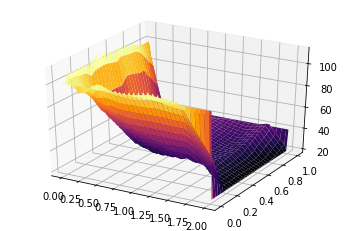

Loading BokehJS ...

In [159]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
 
divs=64
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]
xvec,yvec=np.meshgrid(x,y)
xf=array(xvec).reshape([divs*divs])#[:, None]
yf=array(yvec).T.reshape([divs*divs])#[:, None]
Tmat= psix(params,xf,yf).reshape([divs,divs])  
def draw(Tmat,xmat,ymat):
    fig = plt.figure()
    ax = fig.add_subplot ( 111, projection = '3d' )
    ax.plot_surface ( xmat, ymat,Tmat , cmap = 'inferno')
    plt.draw ( )
    plt.show ( block = False ) # Plotting the NN output

    image = Tmat 
    color_mapper = LogColorMapper(palette="Inferno256", low=20, high=100)
    plot = figure(x_range=(x0,x1), y_range=(y0,y1) , title="cs heat map")
    plot.image(image=[image], color_mapper=color_mapper,
               dh=[1.0], dw=[2.0], x=[0], y=[0])
    color_bar = ColorBar(color_mapper=color_mapper,
                         label_standoff=12, border_line_color=None, location=(0,0))
    #color_mapper=mapper['transform'], width=8,  location=(0,0))
    plot.add_layout(color_bar, 'right')
    output_notebook()
    show(plot)

draw(Tmat,xvec,yvec)

Loading BokehJS ...

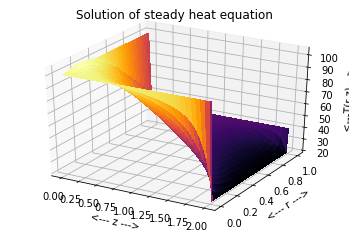

Loading BokehJS ...

In [160]:
if ( __name__ == '__main__' ):
  #timestamp ( )
  nx=divs
  ny=divs
  umax=fd2d_heat_steady_test (nx,ny )
  #timestamp ( )

In [161]:
network_size=[2,32,32,1]

my_file=open("Annflatxtoy.txt","w+")
my_file.write("params= {'nn': array([")
for i in params['nn'][1][0]:
    my_file.write("[")
    for j in i:
        my_file.write(str(j)+" ,")
    my_file.write("],\n") 
my_file.write("])") 
my_file.write("--------------------------------------------------------------------------------------- ")
my_file.write(str(params))
          #rs.rand(outSize))
          #for inSize, outSize in zip(network_size[:-1], network_size[1:])]))
my_file.close()
my_file=open("Annflatxtoy.txt","r")
content= my_file.read()
print (content)
my_file.close()
#network_size=[2,32,32,1]
#[(rs.randn(inSize, outSize),
          #rs.rand(outSize))
          #for inSize, outSize in zip(network_size[:-1], network_size[1:])]

params= {'nn': array([[-7.970305441443545 ,-1.7929463021211915 ,-63.09460658378689 ,45.22946241461602 ,-50.47311644630218 ,-6.028344721455571 ,66.60744267673708 ,-27.603417214693415 ,53.196118243921994 ,-7.75773257347373 ,-38.22723003797082 ,-67.1747199486894 ,16.006911981369587 ,57.378957360421225 ,0.829910813606978 ,48.73437809651975 ,-30.323353847605272 ,0.5912301126055676 ,-11.179076684143219 ,12.547367600775534 ,37.772797934598984 ,58.22768518056655 ,-37.4630803245312 ,-55.48747550613776 ,-53.57247941791539 ,-26.835641964000324 ,-13.426494768742309 ,90.55407608918499 ,-28.851852311122677 ,-70.59343455304571 ,95.1020145604233 ,-60.68204411183716 ,],
[33.50291905555488 ,-0.008978634090409176 ,2.8417956944407337 ,8.793204505773463 ,-17.324451277224334 ,20.147464875740116 ,-28.834740709708505 ,50.18796209322306 ,18.81849769114248 ,59.75685702689559 ,-33.32382675920332 ,-5.002119371670815 ,-51.22978185762973 ,8.300241416691275 ,-69.57298770287929 ,57.36140700026325 ,-7.2797214279860025

Loading BokehJS ...

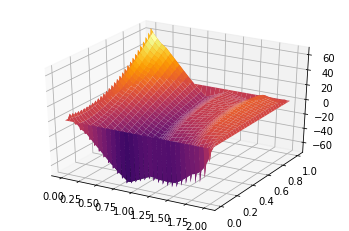

Loading BokehJS ...

15.91999957882399
-8.351108553395742


In [162]:
#import numpy as np1
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)
bokeh.io.reset_output()
bokeh.io.output_notebook()
#  Specify the spatial grid.
nx=divs
ny=divs
xvec = np.linspace ( 0.0, 2.0, nx )
yvec = np.linspace ( 0.0, 1.0, ny )
#
#  Solve the finite difference approximation to the steady 2D heat equation.
umat = fd2d_heat_steady ( nx, ny, xvec, yvec, d, f )
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]

#X = psix(params['nn'], x)
#Y = psiy(params['nn'], y)
xmat,ymat = np.meshgrid ( x,y)
xf=xmat.ravel()[:, None]
yf=ymat.ravel()[:, None]
T= psix(params,xf,yf).reshape([divs,divs])  
T= T -umax
#T=np.abs(T) 
#  Plotting.
xmat, ymat = np.meshgrid ( xvec, yvec )

fig = plt.figure()
ax = fig.add_subplot ( 111, projection = '3d' )
ax.plot_surface ( xmat, ymat,T , cmap = 'inferno')
plt.draw ( )
plt.show ( block = False ) # Plotting the NN output


image = T
color_mapper = LogColorMapper(palette="Inferno256", low=0, high=60)
plot = figure(x_range=(x0,x1), y_range=(y0,y1) , title="cs heat map")
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[2.0], x=[0], y=[0])
color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, border_line_color=None, location=(0,0))
#color_mapper=mapper['transform'], width=8,  location=(0,0))
plot.add_layout(color_bar, 'right')
output_notebook()
show(plot)
print(np.mean((T**2)**0.5))
print(np.mean((T)))
divs=32
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]
xvec,yvec=np.meshgrid(x,y)
xf=array(xvec).reshape([divs*divs])#[:, None]
yf=array(yvec).T.reshape([divs*divs])#[:, None]
T= psix(params,xf,yf).reshape([divs,divs]) 

In [147]:
def boundary2 ( nx, ny, xx, yy, A, rhs ):
#  Left boundary.
  j = 0
  for i in range ( 0, ny ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 100.0

# Right boundary.
  j = nx - 1
  for i in range ( 0, ny ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 20
#to be calculated using free convection formulas with the use og grrashoff Prantl number
    
  #  Upper boundary.
  i = ny - 1
  for j in range ( 0, nx ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 40
#to be calculated using free convection formulas with the use og grrashoff Prantl number
    

  #  Lower boundary.
 
  i = 0
  for j in range ( 0, nx ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] =  100


  return A, rhs

def fd2d_heat_steady ( nx, ny, xx, yy, d, f ):
  import numpy as np
#  Set the total number of unknowns.
  n = nx * ny
#  Allocate the matrix and right hand side.
  A = np.zeros ( [ n, n ] )
  rhs = np.zeros ( n )

#  Define the matrix at interior points.
  A, rhs = interior ( nx, ny, xx, yy, d, f, A, rhs )
#  Handle boundary conditions.
  A, rhs = boundary2 ( nx, ny, xx, yy, A, rhs )
  u = np.linalg.solve ( A, rhs )
  u.shape = ( ny, nx )  
  return u


def fd2d_heat_steady_test (nx,ny):
#
  import numpy as np
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  from matplotlib import cm
  from bokeh.models import ColorBar, LogColorMapper, LogTicker
  from bokeh.plotting import figure, output_file, show
  from bokeh.io import output_notebook
  import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)


  bokeh.io.reset_output()
  bokeh.io.output_notebook()
#  Specify the spatial grid.
  xvec = np.linspace ( 0.0, 2.0, nx )
  yvec = np.linspace ( 0.0, 1.0, ny )
#
#  Solve the finite difference approximation to the steady 2D heat equation.
  umat = fd2d_heat_steady ( nx, ny, xvec, yvec, d, f )

#  Plotting.
  xmat, ymat = np.meshgrid ( xvec, yvec )

  fig = plt.figure()
  ax = fig.add_subplot ( 111, projection = '3d' )
  #ax.plot_surface ( xmat, ymat, umat, cmap = 'cm.coolwarm',
  ax.plot_surface ( xmat, ymat, umat, cmap = 'inferno',
    linewidth = 0, antialiased = False )
  ax.set_xlabel ( '<--- z --->' )
  ax.set_ylabel ( '<--- r --->' )
  ax.set_zlabel ( '<---T(r,z)--->' )
  ax.set_title ( 'Solution of steady heat equation' )
  plt.draw ( )
  plt.show ( block = False )
  '''
  filename = 'fd2d_heat_steady_test01.png'
  fig.savefig ( filename )

  print ( '' )
  print ( '  Plotfile saved as "%s".' % ( filename ) )
  '''
    
  #bokeh plot  
  #output_file('color_bar.html')
  image = umat 
  color_mapper = LogColorMapper(palette="Inferno256", low=20, high=100)
  plot = figure(x_range=(0,2), y_range=(0,1) , title="cs heat map")
  plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[2.0], x=[0], y=[0])
  color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, border_line_color=None, location=(0,0))
  #color_mapper=mapper['transform'], width=8,  location=(0,0))
  plot.add_layout(color_bar, 'right')
  output_notebook()
  show(plot)
  return umat

def d ( xx, yy ):
#*****************************************************************************80
## D evaluates the heat conductivity coefficient.
#  Parameters:
#    Input, real X, Y, the evaluation point.
#    Output, real VALUE, the value of the heat conductivity at (X,Y).
  value = 1.0
  return value

def f ( xx, yy ):
#--------------------------------------------------------------------------------------------------
## F evaluates the heat source term.
#  Parameters:
#    Input, real X, Y, the evaluation point.
#    Output, real VALUE, the value of the heat source term at (X,Y).
  value=0.0
  if(yy<0.2 ): 
        value = 100.0
  return value

def interior ( nx, ny, xx, yy, d, f, A, rhs ):
  import numpy as np

#  For now, assume X and Y are equally spaced.
  dx = xx[1] - xx[0]
  dy = yy[1] - yy[0]

  for ic in range ( 1, ny - 1 ):
    for jc in range ( 1, nx - 1 ):

      ino = ic + 1
      iso = ic - 1
      je = jc + 1
      jw = jc - 1

      kc = ic * nx + jc
      ke = kc + 1
      kw = kc - 1
      kn = kc + nx
      ks = kc - nx

      dce = d ( 0.5 * ( xx[jc] + xx[je] ),         yy[ic] )
      dcw = d ( 0.5 * ( xx[jc] + xx[jw] ),         yy[ic] )
      dcn = d (         xx[jc],           0.5 * ( yy[ic] + yy[ino] ) )
      dcs = d (         xx[jc],           0.5 * ( yy[ic] + yy[iso] ) )

      A[kc,kc] =  ( dce + dcw )*xx[jc]/ dx / dx/0.5*(xx[je]+xx[jw]) + ( dcn + dcs ) / dy / dy
      A[kc,ke] = -  dce*0.5 * (xx[jc] + xx[je])         / dx / dx/0.5 * ( xx[jc] + xx[je] )
      A[kc,kw] =       - dcw*0.5 * ( xx[jc] + xx[jw] )/ dx / dx/0.5 * ( xx[jc] + xx[jw] )
      A[kc,kn] =                           - dcn         / dy / dy
      A[kc,ks] =                                 - dcs   / dy / dy

      rhs[kc] = f ( xx[jc], yy[ic] )

  return A, rhs